<h1>Quiz 1 : Pemahaman ALgoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana Process algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari Algoritma KNN?

1. proses algoritma KKN adalah pada mulanya dipilih titik titik yang berkumpul berdekatan menjadi sebuah kluster, kemudian titik-titik yang terletak di antara dua kluster akan mencari dua tetangga terdekatnya dan titik tersebut akan memiliki kluster yang sama dengan kluster tetangga terdekat yang terbanyak'
2. a. ketika data memiliki pencilan titik yang akan dikenakan algoritma akan memiliki resiko mengikuti kluster yang sama dengan pencilan tersebut
   b. jika sebuah titik memiliki jumlah tetangga dengan kluster berbeda yang sama hal ini akan menjadi permasalahan secara otomatis algoritma akan memilih nilai yang paling terdekat dengan titik tersebut

<h1>Quiz 2 : Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparaeter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot ke dua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [145]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [146]:
from scipy import stats
z=stats.zscore(df)
print(np.where(z>3))

(array([ 25,  69,  73,  95, 110, 115, 121, 121, 123, 158], dtype=int64), array([ 2,  4,  3,  4,  8, 10,  2,  6,  1,  9], dtype=int64))


In [147]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

unif_sc=[]
for i in list(range(2,21)):
    model_knn=KNeighborsClassifier(n_neighbors=i,weights='uniform')
    model_knn.fit(X_train,y_train)
    y_new=model_knn.predict(X_test)
    unif_sc.append(metrics.accuracy_score(y_test, y_new))
dist_sc=[]
for i in list(range(2,21)):
    model_knn2=KNeighborsClassifier(n_neighbors=i,weights='distance')
    model_knn2.fit(X_train,y_train)
    y_new2=model_knn2.predict(X_test)
    dist_sc.append(metrics.accuracy_score(y_test, y_new2))
print("Uniform Scores ->" + str(unif_sc))
print('')
print("Distance Scores ->" + str(dist_sc))


Uniform Scores ->[0.6944444444444444, 0.8055555555555556, 0.7222222222222222, 0.6666666666666666, 0.6388888888888888, 0.75, 0.6388888888888888, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.6388888888888888, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112]

Distance Scores ->[0.75, 0.8333333333333334, 0.7777777777777778, 0.75, 0.7222222222222222, 0.75, 0.6944444444444444, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


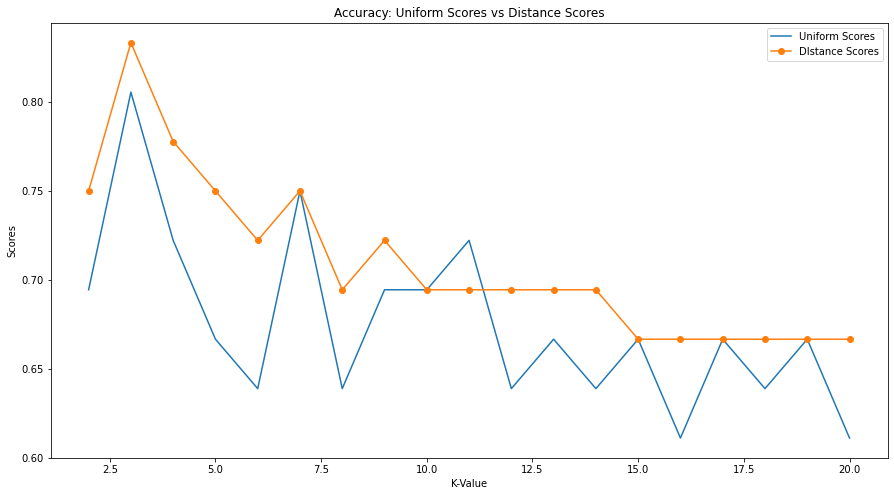

In [148]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(15,8))
x=range(2,21)
ax.plot(x, unif_sc,label='Uniform Scores')
ax.plot(x, dist_sc, marker='o', label='DIstance Scores')
ax.legend()
ax.set_title('Accuracy: Uniform Scores vs Distance Scores')
ax.set_ylabel('Scores')
ax.set_xlabel('K-Value')
plt.show()

Contoh hasil yang di harapkan :

Uniform Scores -> [0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]
 
 distance scores -> [0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

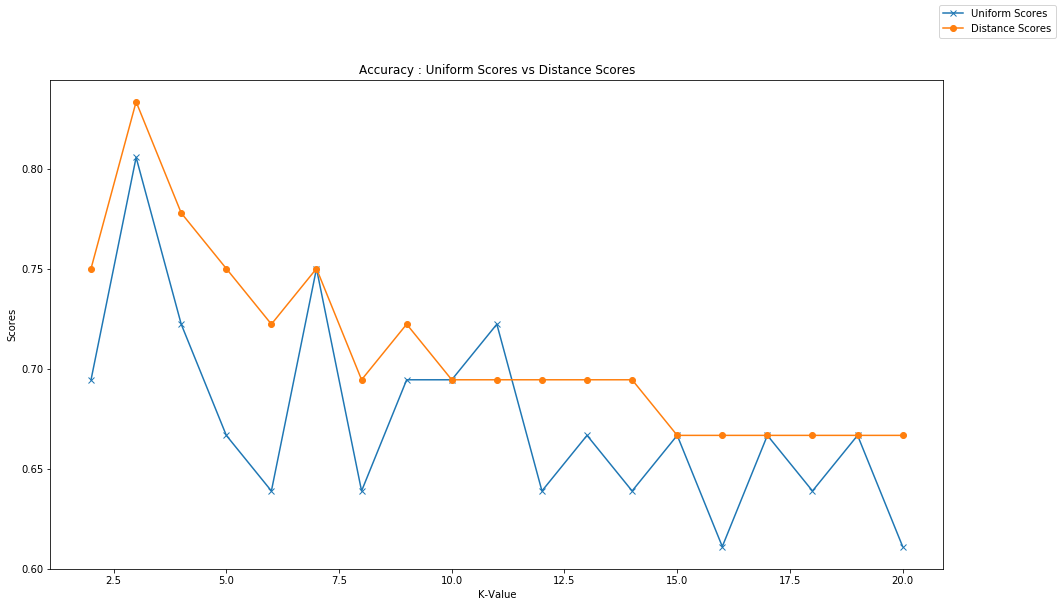

<h1>Quiz 3 : Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [149]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [150]:
from sklearn.linear_model import LinearRegression

model_lr=LinearRegression(fit_intercept=True)
model_lr.fit(X,y)
y_new=model_lr.predict(X)

In [151]:
print("Parameter Koefisien dari model ialah", model_lr.coef_)

Parameter Koefisien dari model ialah [ 1.5 -5.   9.  10. ]


In [152]:
print("Parameter Intercept dari model ialah", model_lr.intercept_)

Parameter Intercept dari model ialah 0.5000000016247412
